# Getting Started with Julia
## Introduction to Julia

Traditional scientific computing is heavily reliant on high-performance code, but with the rise of practical-but-slow languages, science heavily relies on specialized packages that often have a hidden set of "machinery" under the hood, to retain some of the execution speeds of high-performance languages, such as C and FORTRAN. The practicality of popular programming languages is a general result of their dynamic syntax, allowing for compact readable code, with minimal specification related to language requirements, such as static type specifications. Luckily, modern compiler technology can nearly completely compensate for the performance dips observed in dynamic languages like Python and Matlab. Julia is a compiled language that tries to fill this role. 

However, performance in Julia may be unintuitive in the beginning, as the compiler optimizations are not always directly clear, when moving from an interpreted language like Python. Sometimes, it is hard to easily grasp why code is slow in Julia. However, once you understand a little how the language works, through reading and your own experiments, you begin to appreciate the language features and choices that have been made. Then, writing fast code is easier than ever. Of course, you don't have to do this alone. The Julia documentation is extremely rich with examples and detailed explanations of sometimes abstract and hard to understand concepts. Furthermore, many scientists have taken it on to develop general packages that make working in Julia more pleasant, or add the functionality that you are used to in other languages.

In this introduction, we will begin with some basic Julia features and explain different types. It is assumed that you have a working installation of Julia and that you have some experience with programming in general. We will illustrate Julia extensively by comparing this to Python, Matlab, and R, so some basic knowledge of at least one of these languages may be helpful.

## Julia Jargon
Some words you might encounter frequently in any Julia tutorial are listed here with a short explanation. The Julia command-line is the basis for most applications, and is named REPL (Read-Eval-Print-Loop). The package manager is called Pkg, which takes care of all of the dependencies and environments of your Julia code, to make sure everything keeps running smoothly, when using external code. The word dispatch is also frequently used, and refers to the specific implementation of a method for (a set of) input objects. You can, for example, dispatch a function on several different types, which means that you create several implementations of a function on these different types.

## Variables and Types
In Julia, values can be assigned to variables, similarly to Matlab and Python (the arrow-syntax of R is reserved for some other functionality we will get to later). The variable naming system is very flexible, and nearly all unicode (UTF-8) characters are allowed. For the Greek notation enthousiasts: you can use Greek letters in variable names, alongside some diacritic signs, such as hats; and sub- and superscripts. Below you can see an example of different variable names.

In [1]:
x = 1
helloworld = "Hello, World"
ξ = x + 2
γρϵϵκ = "Greek Letters"
ça_va = "ça va bien"; # semi-colon suppresses the final output to be printed

---
Exercise 1: 
---

Try out defining some variables and see which character you can use, and how to use Greek letters in your variables. *(hint: use `\<charname>` to view suggested characters and press `TAB` to insert the selected character.)*

In [2]:
# Try it out yourself!

---

### Chaining variable assignments
As you can see, the variable system is a lot like other languages. However, more is possible. In Julia the '=' sign _binds_ a value to a variable name. We can also chain assignments, which is illustrated below.

In [3]:
a = 3
b = c = 2
d = (e = a+2*b) + 4

11

From this piece of code, we can see that `d` has the value 11. We can deduce this as follows:
1. `a = 3`: the value 3 is assigned to the name `a`
2. `b = c = 2`: the value 2 is assigned to `c` and `b` is equal to `c`, giving it also the value 2
3. `d = (e = a+2*b) + 4`: the value `a`+2*`b` is assigned to `e`, which equals 3+2*2 = 7. Then, `d` equals `e` + 4, which is 11.

### Types I: The Basics
In this subsection, we will discuss the basic type system of Julia. As the typing system is very extensive and may require additional components to fully grasp, we will discuss this throughout the tutorial, to make sure you have the necessary prerequisite information to easily understand different functionalities. The typing in its most basic form is very similar to the system used by the Python numpy package.

Basic types in Julia are:

**Integer Types**:
`Int<x>` and `UInt<x>` where `<x>` is the number of bits of the integer, which can be 8, 16, 32, 64 and 128. Additionally, Julia has the `Bool` type, which has the values `false` and `true`.


In [4]:
someint = 10
typeof(someint)

Int64

**Floating-point Types**:
Julia has three floating point types, half-precision (16-bit), single-precision (32-bit), and double-precision (64-bit), which are named as `Float16`, `Float32`, and `Float64` respectively.

In [5]:
afloat = 10.
typeof(afloat)

Float64

Special floating-point values, which are `Inf` (infinity), `-Inf` (negative-infinity) and `NaN` (not a number). They are by default double precision, but can be made single- or half-precision by adding `32` or `16` to the names respectively. For example, a 32-bit infinity value can be `Inf32`. 

In [6]:
typeof(Inf16)

Float16


**Char and Strings**
In Julia, a character can be represented by `'x'`, so with single quotes. Strings are *always* represented with double quotes: `"this can be a string"`. Using single quotes for defining a string will raise an error. If you want to include double quotes in a string, you can do so by representing the full string in triple double quotes: `"""Adding "quotes" can be done like this"""`. 

In [7]:
st = "this is a string"
println(typeof(st))

ch = 'c' # this is a character
println(typeof(ch))

String
Char


**String concatenation**: An important difference between Julia, Python and Matlab is the way to combine strings. Observe the difference between the following Python and Matlab codes and their Julia equivalent in the cell below:

**Python**:
```python
a = 'Hello, '
b = 'world!'

print(a + b)
```

**MATLAB**:
```matlab
a = 'Hello, ';
b = 'world!';

strcat(a, b)

```

In [8]:
# Julia
a = "Hello, " # remember, double quotes only
b = "world!"

println(a*b) # string concatenation is done with * instead of + in Python or strcat in Matlab

Hello, world!


Similarly, string duplication, which is defined with `*` in Python, is done in Julia using `^` (raise to the power):

In [9]:
x = "Ho"

x^3

"HoHoHo"

### Arrays
An array in Julia is always of the type `Array{T, N}`, which is a parametric type. The `T` specifies the type of the contents of the array, while `N` indicates the dimensionality. Therefore, a 3D array and a vector (1D array) are different types in Julia. We also have two "special" array types, named `Vector{T}` and `Matrix{T}`. These are so-called aliases for the `Array{T, 1}` and `Array{T, 2}` types respectively, but they have been given special names because of their frequency of use. It is important to remember that `Array{T, 1}` and `Vector{T}` are *equivalent*, meaning that they are **not** different types. The same holds for matrices and 2D arrays.

Julia vectors are **ALWAYS** columns. When defining a matrix with a singleton dimension, you'll find that it has the dimensions $1\times n$, because this will be a row. This is opposite to Python, where single dimension arrays are rows.

We can define different types of arrays as follows:

In [8]:
## Defining Vectors:

# commas: Vector{Float64}
v1 = [1., 1.2, 4.3]

# semicolons: Vector{Float64}
v2 = [1.; 2.; 3.]

# newlines: Vector{Float64}
v3 = [
  1.
  2.
  3.
]

## Defining Matrices

# spaces: 1x3 Matrix{Float64}
m1 = [1. 1.2 4.3]

# combining spaces and newlines: 2x3 Matrix{Float64}
m2 = [
  1. 1.2 4.3
  2. 2.2 8.3
]

# semicolons act as newlines
m3 = [1. 1.2 4.3; 2. 2.2 8.3]

2×3 Matrix{Float64}:
 1.0  1.2  4.3
 2.0  2.2  8.3

**Watch out for the following:**

In [14]:
# This is NOT a matrix, but a vector of vectors (not the same, because the dimensions are not enforced to be equal)
not_a_matrix = [[1., 2., 3.], [3., 4., 5.]]

# Because vectors are columns, adding a semicolon or newline will just concatenate the vectors to a large column
also_not_a_matrix = [[1., 2., 3.]; [3., 4., 5.]]

# Adding a space works, but note that you're now specifying column-by-column
this_is_a_matrix = [[1., 2., 3.] [3., 4., 5.]]

3×2 Matrix{Float64}:
 1.0  3.0
 2.0  4.0
 3.0  5.0



#### Indexing
Indexing in Julia is done with `[]`, and according to Julia conventions, indexing starts at 1. However, this is not a hard rule to live by when using Julia. 

While this is not generally recommended, options exist to change the way you index. Examples in order of increasing absurdity:
* [OffsetArrays.jl](https://github.com/JuliaArrays/OffsetArrays.jl) 
* [TwoBasedIndexing.jl](https://github.com/simonster/TwoBasedIndexing.jl) 
* [StarWarsArrays.jl](https://github.com/giordano/StarWarsArrays.jl)

A quick comparison in indexing methods between programming Languages:

|Operation | Python | MATLAB  | Julia | Output |
|----------|--------|---------|-------|--------|
| Defining a list | `a_list = [1, 2, 3, 4, 5]` | `a_list = [1 2 3 4 5]` | `a_list = [1, 2, 3, 4, 5]` | `[1, 2, 3, 4, 5]` |
| Getting the third element | `a_list[2]` | `a_list(3)` | `a_list[3]` | `3` |
| Getting the first two elements | `a_list[:2]` | `a_list(1:2)` | `a_list[1:2]` | `[1, 2]` |
| Getting the second and third elements | `a_list[1:3]` | `a_list(2:3)` | `a_list[2:3]` | `[2,3]` |
| Getting everything from the fourth element on | `a_list[3:]` | `a_list(4:end)` | `a_list[4:end]` | `[4, 5]` |

We see that indexing rules are the same as in Matlab:
1. Indexing starts at 1
2. Slices include the start and the end
3. Indexing ends at `end`

### Mutability
Mutability in Julia is similar to Python. Vectors and Arrays are mutable by default. Tuples are immutable. Making the parallel to Python, Arrays are more-or-less equivalent to a combination between a Python list and a numpy array.

In [10]:
# Integers are immutable
a = 3
b = a
a += 2

# even though we modify a, b remains unmodified
b

3

In [11]:
# Arrays and matrices are mutable
c = [1 2 3]
d = c
# If we mutate an element of c, it also affects d
c[2] = 4

d

1×3 Matrix{Int64}:
 1  4  3

---
Exercise 2: 
---

1. Check the mutability of different types.
2. You can also check if two names point to the same (mutable) variable using `===`.  
Use the `===` operator to verify that `d` and `c` indeed point to the same variable.

In [12]:
# Your turn!

---

### Specifying Types
An optional feature in Julia is specifying the types of each variable. While this may be a bit redundant in very basic code, such as the examples shown here, it can greatly benefit readability or ease-of-use in large complex code. We will dive into when you should specify types later, and just show that it is possible.

In [13]:
# Types are specified
specifiedint::Int64 = 3

# Types are unspecified
unspecifiedint = 4

# Type specification can change how variables are printed. The bool 'int' type has values false(0) and true(1).
yes::Bool = 1
yes

true

## Functions
Functions have a central role in the Julia programming language. Similarly to classes in C++ and Python, they form the backbone of _good_ Julia code. A defining feature called muliple dispatch increases their use and leads to innovative programming techniques. An extensive chapter will cover multiple dipatch later on. First let us show some ways of specifying functions. The most general way is through the `function` keyword.

In [14]:
# Specify a function
function foo()
    println("Hello, world!")
end

foo (generic function with 1 method)

### Methods
The output of the cell above shows 'foo (generic function with 1 method)'. This means that we have defined a function named "foo", and that there is one method coupled to this. We should therefore first clear up the difference between functions and methods. A _function_ is a specified, sometimes very general, procedure, such as "Invert the position of the elements". A _method_ is the specific implementation of this procedure, such as, if the input is a vector, the first element becomes the last, and so on. However, if the input is a multidimensional array, just saying "invert the positions of the elements" is too vague, and we need a different implementation that requires an additional argument, which specifies along which dimension we should invert the positions. The function is in this case the same, but the method is different.

As it turns out, methods have a very important role in Julia. They have a similar role to class methods in object oriented programming languages. However, Julia is not object-oriented. Instead, it provides more freedom, as in an object-oriented language, a method is coupled to an object, defining the implementation of a function where the *first argument* is that object. In Julia, we can define methods for functions not only based on the first argument of a function call, but on the number of arguments and the types of any argument of a function. This is generally useful for mathematical operations, such as addition, where we cannot clearly distinguish one of the inputs that the function "belongs to". (In a + b, the + can belong to either a or b). In object-oriented languages, this is often difficult to solve, and leads to rules that define to which object a method belongs. In Julia, this is solved elegantly by removing the attachment of a method to an object, and making them stand by themselves.

To view the methods of a function, we can use `methods(foo)`:

In [15]:
methods(foo)

# 1 method for generic function "foo" from Main:
 [1] foo()
     @ ~/TUe/Julia-sysbio-workshop/01-Introduction/01-Getting-Started.ipynb:2

### Alternative method of specifying functions
Another way of specifying a function is as follows:

In [16]:
bar() = println("Hello, world!")

bar (generic function with 1 method)

Which we can make multi-line using `begin` and `end` statements.

In [17]:
bar(x) = begin
  println("Hello, $(x)")
  println("You are a $(typeof(x))")
end

bar (generic function with 2 methods)

### Function arguments
Function arguments are separated into **positional** arguments, and **keyword** arguments. As the names say, positional arguments are interpreted based on their position in the function call, whereas keyword arguments are interpreted based on the argument names. Different from Python, specifying default values in Julia does not automatically convert a positional argument to a keyword argument. Instead, function signatures separate them using a semi-colon (`;`). We can add arguments as:
`function name(args; kwargs)`

In [18]:
function foo(a)
    println("Hello, $(a)") # using the $ we can do string interpolation
end

foo (generic function with 2 methods)

We now see that the 'foo' function has 2 methods, one with an argument, and one without. We can add a few more methods.

In [19]:
function foo(a, b)
    println("Hello, $(a), $(b)")
end

function foo(a, b, c; d = 1)
    for i = 1:d
        println("Hello, $(a), $(b), I am $(c)")
    end
end

foo (generic function with 4 methods)

In [20]:
foo("You", "nice to meet you", "Julia"; d = 4)

Hello, You, nice to meet you, I am Julia
Hello, You, nice to meet you, I am Julia
Hello, You, nice to meet you, I am Julia
Hello, You, nice to meet you, I am Julia


### Anonymous functions
Julia also has the option to specify anonymous functions (officially named "closures") using the "->" notation. These functions can be assigned to variables as well.

In [21]:
otherfunc = (x) -> 5*x

#12 (generic function with 1 method)

### Mathematical Operations are Functions
Mathematical operations like addition, multiplication and so on are also functions, each with their methods. It might become evident that functions play a central role in Julia. Take for example, the addition operation. When we ask Julia to show the contents of this function, we see that it has many different methods. This is because of the many different combinations of types that can be specified to the function in general. A separate definition is given for adding two `Float64`s and adding a `Float64` to an `Int64`. This is the case for all operations. The Julia programming style is to favour separate dispatches over internal conversion, as from dispatching functions on various arguments, the types of the inputs and the corresponding output are often known at compile-time, and easily inferred, enabling the compiler to selectively compile and optimize the actually called variations of functions. 

In [22]:
+

+ (generic function with 207 methods)

### Specifying Types of Function Arguments
Similarly to specifying types, we can specify the types of function arguments. In this case, we define a function called `chop`, which has various implementations for different types. For positive integer inputs, it subtracts one. For zero, it returns zero, for negative integers, it throws an exception. For strings however, it cuts off the last character. The method itself is not necessarily important, neither is it very useful, but it suffices to provide a basic idea of what we call type dispatch.

In [23]:
# The first method of chop

function chop(x::Int)
    # This is a trick, using the short circuit property of the ||-operator: if the first entry is valid, the second will not be executed.
    x ≥ 0 || throw(ArgumentError("Integer input of x = $(x) does not satisfy x ≥ 0. Please provide a valid input")) 

    # Short for if x > 0, return x-1, else return x
    return x > 0 ? x-1 : x
end

chop (generic function with 1 method)

In [24]:
# The second method of chop
chop(x::String) = return x[1:end-1]

chop (generic function with 2 methods)

We can test the method easily.

In [25]:
chop(5)

4

In [26]:
chop(0)

0

In [27]:
chop("50")

"5"

We see that it works as supposed for the conditions that were defined. Moreover, unlike Python, function argument types are checked, which means that an error will occur if we try to call `chop` on a `Float32`, for example.

---
Exercise 3: 
---

1. Inspect the methods of the `+` function to see what types this is defined for
2. Add some more methods to the `chop` function
3. Experiment with defining methods and using positional and keyword arguments to define a function with several methods.

In [28]:
# Experiment here!

---

## Control Flow
You may have seen a slight hint of this already, but our programs in Julia can also be composed of several control flow elements. The  components in Julia are:
* conditional statements (if, else, elseif)
* loops (for, while)
* compounding (begin)
* short-circuiting (&&, ||, chaining)
* exception handling (try, catch, finally)
* tasks or coroutines (yieldto)

We will discuss all of them, except the last two, which are only mentioned for completeness, and are better discussed in a more advanced tutorial.

### Conditional Statements and Loops
In Julia, we can make conditional expressions using `if`, similarly to Python and Matlab. The syntax is generally equal to the current MATLAB syntax, requiring an `end` keyword to close the expression. Tabs do not have any syntactic meaning, and are generally only included for readability. The other keywords are `elseif` and `else`. An example:

In [29]:
function conditions(x)

    if x > 0
        println("Your input is $(x), which is positive")
    elseif x < 0
        println("Your input is $(x), which is negative")
    else
        println("Your input is $(x), which is neither negative, nor positive")
    end
end

conditions(4)
conditions(-12)
conditions(0)
conditions(-0)

Your input is 4, which is positive
Your input is -12, which is negative
Your input is 0, which is neither negative, nor positive
Your input is 0, which is neither negative, nor positive


An important difference between Julia, and Matlab & Python, is that the values in conditional expressions *must* be boolean, which means that the Pythonic way of checking if a list or string is empty through `if x` raises an error in Julia code. 

#### Loops
Loops are also syntactically similar to Matlab. We can use the `for` keyword to loop over a predefined set of values, and the `while` keyword to continue repetitive execution until some condition is met. We also close loops with `end`. The `for`-statement can have either the MATLAB or the Python syntax, so writing `for i = 1:10` is equal to writing `for i in 1:10` in terms of the resulting behavior. A small example is given.

In [30]:
for i = 1:10
    print("$(i), ")
end
print("\n")
for i in 1:10
    print("$(i), ")
end

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 
1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 

Looping through indices of an array can also be done similarly to MATLAB in Python, but because Julia does not necessarily enforce users to adapt its 1-based index (and therefore allows users to change the way arrays or custom objects are indexed), Julia has the `eachindex()` expression to safely loop through all indices in an object.

In [31]:
arr = [0., 10., 4., 102.]
for i in eachindex(arr)
    println(arr[i])
end

0.0
10.0
4.0
102.0


*Note: in older Julia code, you may sometimes encounter the `@inbounds for i in 1:length(x)` way of safe indexing. However, the `eachindex` style is preferred*

### Compounding
Compound expressions can be created using the `begin` and `end` keywords, and act as a group of expressions that can be executed to yield a single result.

In [32]:
z = begin
    x = 3
    y = 1
    x-y
end

2

A shorthand way of compounding is done using `;` in this way:

In [33]:
z = (x = 3; y = 2; x+y)

5

### Short-Circuit Evaluations
This type of control flow has already been hinted at. In Julia, the expressions `||` and `&&` depict short-circuited versions of the `or` (`|`) and `and` (`&`) operations. This means that for `||`, the next expression is only executed if the preceding expressions are all `false`, and in `&&`, the next expressions are only executed if all preceding expressions evaluate to `true`. 

---
Exercise 4:
---
Short-circuit evaluations can also be done to catch errors in functions.
Inspect the function with two methods below.

1. Modify the 'if-statement' control flow to a single-line short-circuit evaluation that has the same functionality
2. Test out the implementation to see if it works.

In [34]:
"""
  snake_stack(v1, v2, [vx...])

Concatenates vectors v2 (and optionally more, specified in vx) to vector or matrix v1, reversing each concatenated vector if it belongs to an even column in the output matrix.

# Arguments:
```
  v1::AbstractVecOrMat  : input vector or matrix
  v2::AbstractVector    : vector to concatenate
  [vx] (optional)       : other vectors to concatenate
```
Throws an ArgumentError if one of the vectors to concatenate does not match the dimension of concatenation, specified by size(v1, 1)

# Examples

```julia-repl
julia> snake_stack([1,2,3], [4,5,6])
1 6
2 5
3 4
```
"""
function snake_stack(v1::AbstractVecOrMat, v2::AbstractVector)
  if size(v1, 1) == size(v2, 1)
    return size(v1, 2) % 2 == 0 ? [v1 v2] : [v1 reverse(v2)]
  else
    throw(ArgumentError("Concatenation dimensions of inputs are not equal: $(size(v1,1)) ≠ $(size(v2,1))"))
  end
end

function snake_stack(v1, v2, vx...)
  snake_stack(snake_stack(v1, v2), vx...)
end

snake_stack (generic function with 2 methods)

In [35]:
# Put your testing code here!

---

## Scope of Variables
The scope of a variable is the region in the code where the variable can be accessed. Scoping avoids conflicts with naming of variables. In Julia, the scoping rules can seem slightly difficult at first. But there are good reasons for this behavior.

Initially, Julia uses a so-called *lexical scope*, which is the most common scope paradigm in modern programming languages. This means that the scope of a variable is determined by its location in the written code, contrarily to *dynamic scope*, where a variable's scope is determined by the program's state during runtime. 

Now we can forget about this and just look at the scoping rules for Julia. Scopes are divided into two main categories: global and local. The global scope is the outermost scope in a Julia program, and is constructed by *modules*. Modules are not covered in this tutorial, as they are generally only used in package development, but all you need to know is that Julia variable definitions are always coupled to the module in which they are defined. While variables from other modules can be read, they can *only* be modified within the module where they are defined. Practically, this will not have a lot of consequences, but we can look at an example.

In [36]:
# define module
module Foo
  x = 3
  foo() = x
end

# we can import the module
using .Foo

x = 4
println(x)
println(Foo.x)

4
3


We can see from this example that even though we modify `x` in the outer global scope, the `x` defined within the global scope of the module `Foo` remains bound to its original value. If we want to modify the `x` within `Foo`, we could do:

In [37]:
Foo.x = 7
Foo.foo()

7

And we see that even the function `foo()` that just returns the global `x` returns the new value. In practice, each module has its own global scope. More on modules can be found in [the documentation](https://docs.julialang.org/en/v1/manual/modules/). Now, let's move on to the local scope.

The lcoal scope is constructed by other block constructors such as `struct`, `for`, `while`, `macro`, among others. Blocks that do **not** define a new local scope are `begin`-blocks and `if`-blocks. Two types of local scopes exist: the hard local and the soft local. Hard local scopes are created by `do`-blocks, `let`-blocks, functions, comprehensions and generators, while loops, structs and `try`-blocks create soft local scopes. The difference between soft and hard local scopes is in the way they handle variable assignment when a global variable with the same name exists. 

### Hard Local
If a global variable exists, and it a variable with the same name is assigned in a hard local scope, the global variable remains assigned in the global scope, and a new local variable with the same name is created. This does not lead to problems, because the local variable is not accessible in the global scope anyway. This can be illustrated:

In [38]:
# we define y and z
y = 30
z = 12
function dothis()
  y = z + 2
  return y
end

println("z has the value $(z)")
println("y has the value $(y)")

z has the value 12
y has the value 30


We see that even though we "reassigned" `y` within the function, this does not affect the global `y`. What is also apparent from this example is that we can read global variables from a local scope as well. This is a general rule, as inner scopes can **always** access variables from their outer scopes.

### Soft local
The soft local scope is slightly more complicated, as its behavior differs based on the way code is executed. If a local variable is defined within a soft local scope, while a global variable exists, one of two things can happen:
* In *non-interactive* context: an ambiguity warning is printed, and a new local is created in the scope of the assignment (same behavior as hard-local, but with a warning)
* In *interactive* context: the global variable is assigned.

**Why this difference?**

This difference is a result of both community wants, and the way interactive and non-interactive contexts are used differently. In a non-interactive context, such as a script that we import, we don't necessarily want to interact with variables assigned within this script. Usually, non-interactive contexts are sets of functions that we import or include in a script. In interactive contexts, we usually directly interact with the variables we define. An example illustrates this difference nicely:


In an interactive context, code like the one below is not uncommon to encounter:

In [39]:
x = 3
for i in 1:10
  x = x + 1
end
println(x)

13


However, when we look at the difference in scoping, if `for` defined a hard scope, the `x` defined within the for-loop would not modify the globally defined `x`. But to make life easier for people, Julia implicitly assumes that this is something you want to do in an interactive context, and behaves that way. However, in a non-interactive context, such as a file you import, the code above is something you would only want to encounter *within* a function, so *within* a **local scope**, instead of a global scope. Let's see what happens if we include a julia file, where a for-loop modifies a global variable.

In [40]:
code = """
  x = 3
  for i in 1:10
    x = x + 1
  end
  println(x)
"""

# This is going to error, so I put it in a try-catch statement
try
  include_string(Main, code)
catch e
  e
end

┌ Warning: Assignment to `x` in soft scope is ambiguous because a global variable by the same name exists: `x` will be treated as a new local. Disambiguate by using `local x` to suppress this warning or `global x` to assign to the existing global variable.
└ @ nothing string:3


LoadError("string", 2, UndefVarError(:x))

So now let's analyze what happens in the code we just wrote:
1. We assign a global `x`
2. We start a for-loop, constructing a soft local scope
3. We reassign `x` to be `x+1`, defining `x` as a new local
4. We then move to the next run of the for-loop, where `x = x + 1` errors, because the compiler assumed we would add 1 to the global `x`, but `x` is now local, and is therefore undefined.

This seems inconvenient, but see what happens if we import this as a function:

In [41]:
code = """
  function add_to_three(n)
    x = 3
    for i in 1:n
      x = x + 1
    end
    x
  end
"""

include_string(Main, code)
add_to_three(10)

13

Now it works! This is because we defined `x` in a local scope. As `x` is already local, we can just modify its value. Therefore, when defining code in separate scripts, it is best practice to define functions or modules, to separate scopes! We can illustrate what could happen if you don't by explicitly indicating that we want to modify globals:

In [42]:
# code we import
code = """
  x = 3
  for i in 1:10
    global x = x + 1
  end
""";

In [43]:
# At the start of a long script
x = 123
include_string(Main, code)
# .
# .
# .
# below we finally use x
println(x)

13


We see that the include function modifies our globally defined `x = 123` to `x = 13`, but we can only see this if we explicitly look at the file that we import (which can be incredibly long as well). These things cause a lot of bugs and therefore the Julia developers determined this scoping behavior.

### Comparison with Python
To conclude, a short comparison with Python. In Python, scoping only applies to classes, and each file has its own scope (from which elements have to be explicitly imported using `from <file> import <thing>`). This means that in loops, such as this while-loop below, we can define a new variable, which will be valid even when we exit the loop, while in Julia, this *local* variable is not valid anymore after the while loop ends. However, in Julia this only works in an interactive environment, of course, because otherwise we would get an ambiguity warning for `x`, followed by an error.

Observe the following difference:

#### Python
```python

x = 0
while x < 3:
  y = x
  x = y + 1

print(x) # 3 
print(y) # 2
```

#### Julia
```julia
x = 0
while x < 3
  y = x # assign new 'local' y
  x = y + 1 # soft-scope + interactive: x is already 'global', so assign to 'x'
end

println(x) # 3
println(y) # ERROR: UndefVarError: `y` not defined 
```

## The Package Manager (Pkg)

Packages are a large component of any programming language, and large scale adaptation of a language for a specific purpose is strongly dependent on the availability of sufficient and useful packages. To illustrate the availability of packages in Julia, see the figure below to get an indication of packages available to Julia that are useful for biologists:

![Julia Ecosystem](../figures/ecosystem.webp)
*Figure from [Julia for Biologists](https://www.nature.com/articles/s41592-023-01832-z)*

As you can see, there is already a **huge** amount of available packages (and new packages are being continuously developed!).


In Julia, the use of external code is facilitated through the package manager, or Pkg. From the Julia command line (REPL), you can access the package manager by pressing `]`. You will observe that `julia>` changes into `(<?>) pkg>` where <?> is the current environment that is loaded. 

### Project and Manifest files
Pkg keeps track of all the project dependencies through the `Project.toml` and the `Manifest.toml` files. The `Project.toml` file is included in every Julia package and environment, and depicts the main dependencies of any environment. It also describes the different packages that can be loaded directly in Julia code in the environment. The project file also contains project metadata when developing packages, such as the authors and the package version. The manifest file is an automatically generated file that contains the *specific* environment state for the user. In general, you only share the `Project.toml` file when sharing code, while the manifest file is specific for the user. This contains the Julia version and all of the sub-dependencies of the packages available in the project.

### The Global Environment
When loading Pkg in a new Julia REPL, the global environment is automatically activated. This is visible as `(@v1.x)` where 1.x indicates the current Julia version. 

### Creating Environments
To activate or create a new environment, you can navigate to your desired project folder, start up a Julia REPL in there (or use the cd() `Julia` command to navigate) and start Pkg by pressing `]`. You can then use the command `activate .` (with the dot to specify the current folder) to activate or create a new environment. To reactivate the global environment you can use `activate` without any other arguments.

### Installing Packages
Installing a package can be done with the `add` command, which will add the specific package to the `Project.toml` file and makes sure that the dependencies are installed and added to the `Manifest.toml` file. Removing packages can be done with the `rm` command.

### Loading an Environment from a Project file
To load and install all packages from a project file, start up a REPL in the folder containing the project-file, and open the package manager. Use the `instantiate` command to install the required packages.

### Other Commands
You can press `?` to view a list of all commands of Pkg, with a short explanation

## Using Packages
Installed packages can be used in Julia code with the `using` keyword to load all of the functions into the global namespace. In that case, you won't have to use the name of the package before every loaded function. You can also load (parts of) packages using the `import` keyword, but you will then have to use the name of the imported package before all used functions. In the current project-file, you can see that no package is loaded. However, we can already import some packages that are not imported by default, but are included in the Julia standard library. First, we activate and instantiate the current environment, which we can also do in a Julia script, instead of using the REPL.

```julia
using Pkg # You can also load the package manager
Pkg.activate("../.")
Pkg.instantiate()
```

Now we can load the statistics package to use its functions. This package is currently included in the Standard Library, which means that we can use its functions once we import the package, and that we do not have to install the package separately. When developing a package, however, it is recommended to add the package to the Project-file using the `add` command anyway, to prevent future compatibility issues, in case the package is removed from the standard library in a newer version of Julia.

In [44]:
using Statistics

arr = [4., 1.5, 2.3, 1.]
println(mean(arr))

2.2


We can also use the import statement to load only specific functions, such as the determninant function from the LinearAlgebra package (also standard library).

In [45]:
import LinearAlgebra.det # Import the specific function from a library

A = [1 2 3; 4 1 6; 7 8 1]
det(A)

104.0

In case we want a nonstandard package included in our project, we must first add it to our project using the package manager. However, in this case, the `Project.toml`-file already contains all the packages you will need in this tutorial. Therefore, the `instantiate()`-command will have made sure all of these packages are accessible and usable. For example, the nonstandard package `Plots.jl` can be loaded into this project without any problems, and this enables us to make figures.

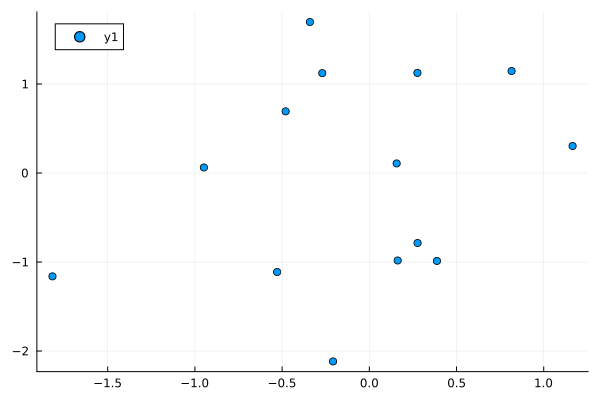

In [47]:
using Plots: scatter # load the Plots library (specifically the scatter function)
using Random # load the random library (standard)

x = randn(Float64, (14,))
y = randn(Float64, (14,))
scatter(x, y)